In [1]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway, ttest_ind
from scipy.stats import skew, kurtosis
from scipy.stats import wilcoxon

In [ ]:
#读文件
# SHDataFrame = pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\SH.xlsx')
# SZDataFrame=pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZ.xlsx')
# SHData = pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\SH.xlsx').to_numpy()
# SZData=pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZ.xlsx').to_numpy()
# SHk0025tf16tt1PreSummary=pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SHk0.025tf16tt1PreSummary.csv').to_numpy()
# SHk0075tf11tt2PostSummary=pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SHk0.075tf11tt2PostSummary.csv').to_numpy()
# SZk115tf23tt4PreSummary=pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZk1.15tf23tt4PreSummary.csv').to_numpy()
# SZk002tf11tt1PostSummary=pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZk0.02tf11tt1PostSummary.csv').to_numpy()
# 假设我们有四组数据（每边两个）
# SHxData=SHData[:,0]
# SZxData=SZData[:,0]
# SHPreYieldRate = SHData[:,3]*100
# SHPostYieldRate = SHData[:,4]*100
# SZPreYieldRate = SZData[:,3]*100
# SHPreExcessYieldRate = SHk0025tf16tt1PreSummary[:,7]*100
# SHPostExcessYieldRate = SHk0075tf11tt2PostSummary[:,7]*100
# SZPreExcessYieldRate = SZk115tf23tt4PreSummary[:,7]*100
# SZPostExcessYieldRate = SZk002tf11tt1PostSummary[:,7]*100

In [ ]:
#验证k的变化原因
SHpreData = pd.read_csv(r'F:\热爱学习\jupyter\量化交易\配对交易\结果\fSHPreSummary.csv')
SHpostData = pd.read_csv(r'F:\热爱学习\jupyter\量化交易\配对交易\结果\fSHPostSummary.csv')
merged_df = pd.merge(SHpreData, SHpostData, on='AID', how='inner')
merged_df = merged_df[(merged_df['PreMaxYiled'] >= 0) & (merged_df['PostMaxYiled'] >= 0)]
merged_df

In [ ]:

merged_df['Difference'] = merged_df['PreMaxK'] - merged_df['PostMaxK']
# 统计大于0的数量
count_positive = (merged_df['Difference'] >0).sum()

# 统计小于0的数量
count_negative = (merged_df['Difference'] < 0).sum()

# 打印结果
print(f'大于0的数量: {count_positive}')
print(f'小于0的数量: {count_negative}')
print(merged_df['Difference'].mean())

In [ ]:
#转为表格
Data = pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\OptimalTradingStrategy.xlsx').to_numpy()
# 假设你有三个列向量 x、y、z
x = Data[:,1]
y = Data[:,0]
z = Data[:,5]

# 创建一个 DataFrame
data = {'x': x, 'y': y, 'z': z}
df = pd.DataFrame(data)
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df['z'] = df['z'].apply(lambda x: '{:.2%}'.format(x))
# 将 DataFrame 转置（Transpose），使得 x、y 成为表的横轴和纵轴
df_transposed = df.pivot(index='y', columns='x', values='z')

# 打印结果
df_transposed.to_csv('SZPostOptimalTradingStrategy.csv')

In [1]:
Alldata=pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\OptimalTradingStrategyStatic.xlsx').to_numpy()

# SHData = pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\SH.xlsx').to_numpy()
# SZData=pd.read_excel('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZ.xlsx').to_numpy()
# SHPreYieldRate = SHData[:,3]*100
# SHPostYieldRate = SHData[:,4]*100
# SZPreYieldRate = SZData[:,3]*100
# SZPostYieldRate = SZData[:,4]*100
#
# SHPreData = pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SHk0.025tf16tt1PreSummary.csv')
# SHPostData = pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SHk0.075tf11tt2PostSummary.csv')
# SZPreData = pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZk1.15tf23tt4PreSummary.csv')
# SZPostData=pd.read_csv('F:\热爱学习\jupyter\量化交易\配对交易\结果\SZk0.02tf11tt1PostSummary.csv')
# SHPreYieldRate = SHPreData['annualExcessYieldRate(non-compounding)']*100
# SHPostYieldRate = SHPostData['annualExcessYieldRate(non-compounding)']*100
# SZPreYieldRate = SZPreData['annualExcessYieldRate(non-compounding)']*100
# SZPostYieldRate = SZPostData['annualExcessYieldRate(non-compounding)']*100

#描述性统计
def calculate_statistics(data):
    # 计算均值
    mean_value = np.mean(data)
    # 计算标准差
    std_dev = np.std(data)
    # 计算偏度
    skewness = skew(data)
    # 计算峰度
    kurt = kurtosis(data)
    # 计算最小值
    min_value = np.min(data)
    # 计算最大值
    max_value = np.max(data)
    # 计算中位数
    median_value = np.median(data)
    # 计算小于0的观测值占比
    negative_percentage = np.sum(np.array(data) < 0) / len(data) * 100
    return {
        '均值': mean_value,
        '标准差': std_dev,
        '偏度': skewness,
        '峰度': kurt,
        '最小值': min_value,
        '最大值': max_value,
        '中位数': median_value,
        '小于0的观测值占比': negative_percentage
    }
for column in Alldata.T:
    print(calculate_statistics(column))

# print(calculate_statistics(SHPreYieldRate))
# print(calculate_statistics(SHPostYieldRate))
# print(calculate_statistics(SZPreYieldRate))
# print(calculate_statistics(SZPostYieldRate))

# print(calculate_statistics(SHPreYieldRate))
# print(calculate_statistics(SHPostYieldRate))
# print(calculate_statistics(SZPreYieldRate))
# print(calculate_statistics(SZPostYieldRate))

NameError: name 'pd' is not defined

In [61]:
#单样本Newey-West t检验
data = SZPostExcessYieldRate.astype(float)

# 计算 Newey-West 标准误差
lags = 8  # 设置滞后阶数
cov_type = 'HAC'  # 设置协方差估计类型为 HAC (Heteroskedasticity and Autocorrelation Consistent)
model = sm.OLS(data, sm.add_constant(np.ones_like(data)))
results = model.fit(cov_type=cov_type, cov_kwds={'maxlags': lags})

# 提取 t 统计量和 p 值
t_stat = results.tvalues[0]
p_value = results.pvalues[0]

# 打印结果
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# 判断是否显著大于0
alpha = 0.01
if p_value < alpha:
    print("在显著性水平为 {} 下，拒绝零假设，表明样本均值显著大于0。".format(alpha))
else:
    print("在显著性水平为 {} 下，无法拒绝零假设，无足够证据表明样本均值显著大于0。".format(alpha))


T-statistic: 1.4851624275422912
P-value: 0.13750080228143438
在显著性水平为 0.01 下，无法拒绝零假设，无足够证据表明样本均值显著大于0。


In [71]:
#双样本Newey-West t检验
# 生成一些示例数据
data1 = SHPreExcessYieldRate.astype(float)
data2 = SHPostExcessYieldRate.astype(float)
# 计算 Newey-West 标准误差
lags = 8  # 设置滞后阶数
cov_type = 'HAC'  # 设置协方差估计类型为 HAC (Heteroskedasticity and Autocorrelation Consistent)
model = sm.OLS(data1, sm.add_constant(data2))
results = model.fit(cov_type=cov_type, cov_kwds={'maxlags': lags})

# 提取 t 统计量和 p 值
t_stat = results.tvalues[0]
p_value = results.pvalues[0]

# 打印结果
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# 判断是否显著大于0
alpha = 0.01
if p_value < alpha:
    print("在显著性水平为 {} 下，拒绝零假设，表明两样本均值具有显著差异。".format(alpha))
else:
    print("在显著性水平为 {} 下，无法拒绝零假设，无足够证据表明两样本均值具有显著差异。".format(alpha))


ValueError: endog and exog matrices are different sizes

In [81]:
#双样本T检验
# 生成两个样本数据
def FAndTTest(n1, n2):
    # 首先进行F检验（方差齐性检验）
    f_statistic, Fp_value = f_oneway(n1, n2)
    # 如果P值小于显著性水平（例如0.05），则拒绝原假设，认为两总体方差不相等
    if Fp_value < 0.05:
        t_statistic, Tp_value = ttest_ind(n1, n2, equal_var=True)  # 如果方差不等，应设置equal_var=False
        # print('方差无差异')
        # # 对于T检验，如果P值小于显著性水平（例如0.05），则拒绝原假设，认为两总体均值无显著差异
        # if Tp_value < 0.05:
        #     print("两样本有差异,P值为：",Tp_value)
        # else:
        #     print("两样本无差异,P值为：",Tp_value)
        # print('*'*100)
        return [t_statistic, Tp_value]
    else:
        t_statistic, Tp_value = ttest_ind(n1, n2, equal_var=False)  # 如果方差不等，应设置equal_var=False
        # print('方差有差异')
        # # 对于T检验，如果P值小于显著性水平（例如0.05），则拒绝原假设，认为两总体均值无显著差异
        # if Tp_value < 0.05:
        #     print("两样本有差异,P值为：",Tp_value)
        # else:
        #     print("两样本无差异,P值为：",Tp_value)
        # print('*'*100)
        return [t_statistic, Tp_value]

sample1 = SZPreExcessYieldRate.astype(float)
sample2 = SZPostExcessYieldRate.astype(float)

# 进行两样本t检验
result=FAndTTest(sample1,sample2)

# 输出结果
print(f"t-statistic: {result[0]}")
print(f"p-value: {result[1]}")

# 判断显著性水平
alpha = 0.01
if p_value < alpha:
    print("拒绝零假设，样本之间存在显著差异")
else:
    print("无法拒绝零假设，样本之间不存在显著差异")


t-statistic: 0.4927142881666256
p-value: 0.6261425799919196
无法拒绝零假设，样本之间不存在显著差异


In [67]:
# 示例数据
sample1 = SHPreExcessYieldRate.astype(float)
sample2 = SHPostExcessYieldRate.astype(float)

# 执行Wilcoxon秩和检验
statistic, p_value = wilcoxon(sample1, sample2)

# 输出检验结果
print(f"Wilcoxon Statistic: {statistic}")
print(f"P-value: {p_value}")

# 根据p-value判断显著性
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，两样本有显著差异")
else:
    print("接受原假设，两样本没有显著差异")

ValueError: The samples x and y must have the same length.

In [79]:
#Bootstrap检验
# 原始样本数据
sample1 = SZPreExcessYieldRate.astype(float)
sample2 = SZPostExcessYieldRate.astype(float)

# 定义Bootstrap函数
def bootstrap_test(sample1, sample2, num_iterations=10000):
    np.random.seed(42)  # 设置随机种子以确保结果的可重复性
    n1, n2 = len(sample1), len(sample2)
    observed_difference = np.mean(sample1) - np.mean(sample2)

    # 合并两个样本数据
    combined_data = np.concatenate((sample1, sample2))

    bootstrap_differences = []
    for _ in range(num_iterations):
        # 通过重抽样生成新的样本
        bootstrap_sample = np.random.choice(combined_data, size=n1 + n2, replace=True)

        # 计算新样本的差异
        bootstrap_difference = np.mean(bootstrap_sample[:n1]) - np.mean(bootstrap_sample[n1:])
        bootstrap_differences.append(bootstrap_difference)

    # 计算p值
    p_value = np.mean(np.abs(bootstrap_differences) >= np.abs(observed_difference))

    return observed_difference, p_value

# 执行Bootstrap检验
observed_diff, p_value = bootstrap_test(sample1, sample2)

# 打印结果
print(f"观察到的均值差异: {observed_diff}")
print(f"p值: {p_value}")


观察到的均值差异: 3.3260104523241516
p值: 0.6321


Uncorrected t-statistic: 0.0
Uncorrected p-value: 1.0
Corrected t-statistic (Newey-West): -1259888492073682.5
Corrected p-value (Newey-West): 0.0


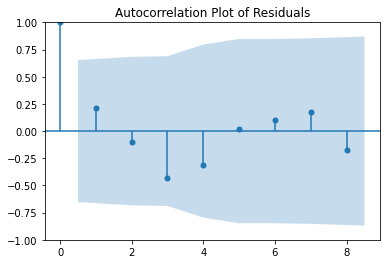

In [19]:

# 绘制自相关图
sm.graphics.tsa.plot_acf(SZPreYieldRate, lags=8)  # 指定滞后阶数
plt.title('Autocorrelation Plot of Residuals')
plt.show()

